In [1]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import datetime

In [2]:
df_hr= pd.read_csv("Mtry_CA_hr.csv", names = ("Date Time", "Water Level", "Sigma", "I", "L"), header = 0)

In [3]:
df_hr.tail()

,Date Time,Water Level,Sigma,I,L
2155,2017-02-28 19:00,1.499,0.060,0,0
2156,2017-02-28 20:00,1.462,0.072,0,0
2157,2017-02-28 21:00,1.294,0.061,0,0
2158,2017-02-28 22:00,0.952,0.049,0,0
2159,2017-02-28 23:00,0.576,0.052,0,0


In [4]:
df_hr["Date Time"]= pd.to_datetime(df_hr["Date Time"], format = '%Y %m %d %H:%M:')

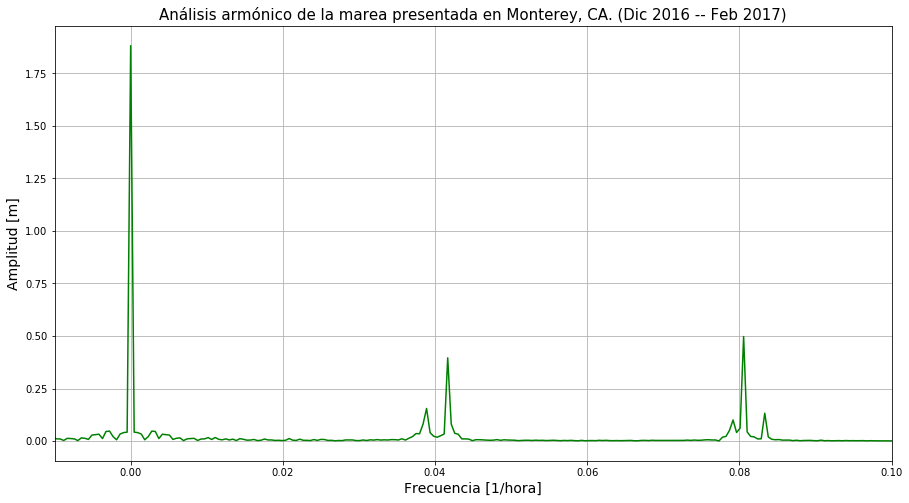

In [5]:
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# numero de datos
N_d = 2160
# Separacion de tiempo entre cada medicion
T_d = 1.0
#aplicacion de la transformada de Fourier
y_hr = df_hr["Water Level"] 
yf_hr = fft(y_hr)
#Cambio de variable de tiempo a uno de frecuencias.
xf_hr = fftfreq(N_d, T_d)
xf_hr = fftshift(xf_hr)
# Conjunto de datos dados por la transformada de fourier para graficar
yplot_hr = fftshift(yf_hr)

#grafica de lo obtenido con la transformada de Fourier
import matplotlib.pyplot as plt
graf = plt.plot(xf_hr, 2.0/N_d *abs(yplot_hr), 'g-')
plt.xlim(-0.01,0.1)
plt.grid(True)

plt.xlabel('Frecuencia [1/hora]', fontsize=14)
plt.ylabel('Amplitud [m]', fontsize=14)
plt.title('Análisis armónico de la marea presentada en Monterey, CA. (Dic 2016 -- Feb 2017)', fontsize=15)

fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()



# Conjunto de datos dados por la transformada de fourier para graficar

In [6]:
(31*2+28)*24 #es igual numero de datos

2160

In [7]:
a = 2*np.absolute(yf_hr)/N_d #N_d es el numero de datos especificado en donde se trabajó con la transformada rapida de fourier

In [8]:
print(np.where(a[:,]>0.045))
b= a[a[:,]>0.045]
b

(array([   0,    6,    7,   83,   84,   90,   91,  170,  171,  173,  174,
        180, 1980, 1986, 1987, 1989, 1990, 2069, 2070, 2076, 2077, 2153,
       2154], dtype=int64),)


array([ 1.8818037 ,  0.04730833,  0.04553544,  0.08048047,  0.15509528,
        0.39609257,  0.08066617,  0.05127162,  0.10018642,  0.06123929,
        0.49737202,  0.13258916,  0.13258916,  0.49737202,  0.06123929,
        0.10018642,  0.05127162,  0.08066617,  0.39609257,  0.15509528,
        0.08048047,  0.04553544,  0.04730833])

In [9]:
#Centro de los datos
2160/2

1080.0

In [10]:
#La 0 es la que se encuentra en el origen, pues es la altura media que se presenta para las mareas en Monterey
print( 'Primer Armónico notorio')
print('Amplitud=',2.0*np.absolute(yf_hr[84,]/N_d))
print('frecuencia=', xf_hr[int(N_d/2 +84),])
print('periodo=', 1/xf_hr[int(N_d/2 +84),])
print()
print('SegundoArmónico notorio')
print('Amplitud=',2.00*np.absolute(yf_hr[90,]/N_d))
print('frecuencia=', xf_hr[int(N_d/2 +90),])
print('periodo=', 1/xf_hr[int(N_d/2 +90),])

print()
print('Tercer Armónico notorio')
print('Amplitud=',2.0*np.absolute(yf_hr[171,]/N_d))
print('frecuencia=', xf_hr[int(N_d/2 +171),])
print('periodo=', 1/xf_hr[int(N_d/2 +171),])

print()
print('Cuarto armónico notorio')
print('Amplitud=',2.0*np.absolute(yf_hr[174,]/N_d))
print('frecuencia=', xf_hr[int(N_d/2 +174),])
print('periodo=', 1/xf_hr[int(N_d/2 +174),])

print()
print('Quinto armónico notorio')
print('Amplitud=',2.0*np.absolute(yf_hr[180,]/N_d))
print('frecuencia=', xf_hr[int(N_d/2 +180),])
print('periodo=', 1/xf_hr[int(N_d/2 +180),])

print('Altura media de las mareas = ', np.absolute(yf_hr[0,]/N_d))

Primer Armónico notorio
Amplitud= 0.155095284116
frecuencia= 0.0388888888889
periodo= 25.7142857143

SegundoArmónico notorio
Amplitud= 0.39609256604
frecuencia= 0.0416666666667
periodo= 24.0

Tercer Armónico notorio
Amplitud= 0.100186416234
frecuencia= 0.0791666666667
periodo= 12.6315789474

Cuarto armónico notorio
Amplitud= 0.497372020197
frecuencia= 0.0805555555556
periodo= 12.4137931034

Quinto armónico notorio
Amplitud= 0.132589160654
frecuencia= 0.0833333333333
periodo= 12.0
Altura media de las mareas =  0.940901851852


In [11]:
# Otros armónicos no muy notorios
print( 'Armonico no muy notorio')
print('Amplitud=',2.0*np.absolute(yf_hr[6,]/N_d))
print('frecuencia=', xf_hr[int(N_d/2 +6),])
print('periodo=', 1/xf_hr[int(N_d/2 +6),])
print()

print( 'Armonico no muy notorio')
print('Amplitud=',2.0*np.absolute(yf_hr[7,]/N_d))
print('frecuencia=', xf_hr[int(N_d/2 +7),])
print('periodo=', 1/xf_hr[int(N_d/2 +7),])
print()
print( 'Armonico no muy notorio')
print('Amplitud=',2.0*np.absolute(yf_hr[83,]/N_d))
print('frecuencia=', xf_hr[int(N_d/2 +83),])
print('periodo=', 1/xf_hr[int(N_d/2 +83),])
print()
print( 'Armonico no muy notorio')
print('Amplitud=',2.0*np.absolute(yf_hr[91,]/N_d))
print('frecuencia=', xf_hr[int(N_d/2 +91),])
print('periodo=', 1/xf_hr[int(N_d/2 +91),])
print()
print( 'Armonico no muy notorio')
print('Amplitud=',2.0*np.absolute(yf_hr[170,]/N_d))
print('frecuencia=', xf_hr[int(N_d/2 +170),])
print('periodo=', 1/xf_hr[int(N_d/2 +170),])
print()
print( 'Armonico no muy notorio')
print('Amplitud=',2.0*np.absolute(yf_hr[173,]/N_d))
print('frecuencia=', xf_hr[int(N_d/2 +173),])
print('periodo=', 1/xf_hr[int(N_d/2 +173),])
print()

Armonico no muy notorio
Amplitud= 0.0473083259917
frecuencia= 0.00277777777778
periodo= 360.0

Armonico no muy notorio
Amplitud= 0.0455354397391
frecuencia= 0.00324074074074
periodo= 308.571428571

Armonico no muy notorio
Amplitud= 0.0804804706408
frecuencia= 0.0384259259259
periodo= 26.0240963855

Armonico no muy notorio
Amplitud= 0.0806661696603
frecuencia= 0.0421296296296
periodo= 23.7362637363

Armonico no muy notorio
Amplitud= 0.0512716160607
frecuencia= 0.0787037037037
periodo= 12.7058823529

Armonico no muy notorio
Amplitud= 0.0612392868872
frecuencia= 0.0800925925926
periodo= 12.4855491329



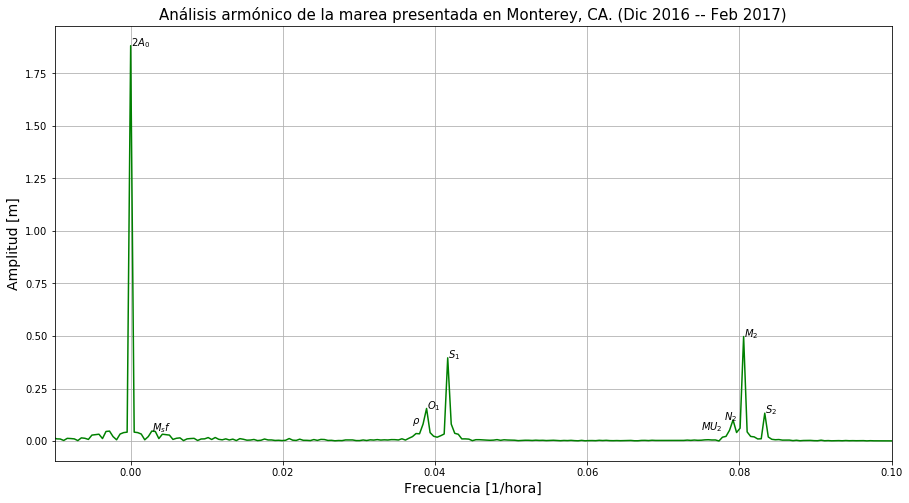

In [12]:
fig = plt.gcf()
fig.set_size_inches(15, 8)

graf = plt.plot(xf_hr, 2.0/N_d *abs(yplot_hr), 'g-')
plt.xlim(-0.01,0.1)
plt.grid(True)

plt.xlabel('Frecuencia [1/hora]', fontsize=14)
plt.ylabel('Amplitud [m]', fontsize=14)
plt.title('Análisis armónico de la marea presentada en Monterey, CA. (Dic 2016 -- Feb 2017)', fontsize=15)

plt.text(0.0388888888889, 0.155095284116, '$O_1$')
plt.text(0.0416666666667, 0.39609256604, '$S_1$')
plt.text(0.078, 0.100186416234, '$N_2$')
plt.text(0.0805555555556, 0.497372020197, '$M_2$')
plt.text(0.0833333333333, 0.132589160654, '$S_2$')
plt.text(0, 2*0.940901851852, '$2 A_0$')

plt.text(0.00277777777778, 0.0473083259917, '$M_sf$')
plt.text(0.037, 0.0804804706408, r'$\rho$')
plt.text(0.075, 0.0512716160607, '$MU_2$')
plt.show()